# Regularization L2

L2 regularization, also known as weight decay, is a technique used in machine learning to prevent overfitting and improve the generalization performance of a model. It is commonly applied to the weights of a neural network.

In the context of neural networks, the L2 regularization adds a penalty term to the loss function based on the squared magnitude of the weights.

The regularization term penalizes large weights, discouraging the model from relying too much on any single feature and promoting a more evenly distributed set of weights. This can help prevent overfitting by reducing the complexity of the model.

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(100,
                  noise=0.25,
                  random_state=667
                  )

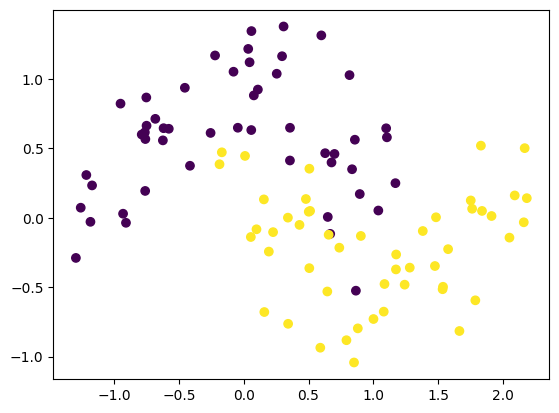

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Modeling

In [6]:
model1 = Sequential()

model1.add(Dense(128,input_dim=X.shape[1], activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid')) #binary class

model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [7]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history1 = model1.fit(X, y,
                      epochs=2000,
                      validation_split = 0.2,
                      verbose=2
                      )

Epoch 1/2000
3/3 - 1s - loss: 0.5595 - accuracy: 0.8375 - val_loss: 0.5238 - val_accuracy: 0.7500 - 1s/epoch - 416ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.3160 - accuracy: 0.8750 - val_loss: 0.6345 - val_accuracy: 0.7500 - 41ms/epoch - 14ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.2300 - accuracy: 0.9125 - val_loss: 0.7738 - val_accuracy: 0.7500 - 56ms/epoch - 19ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.2296 - accuracy: 0.9000 - val_loss: 0.8893 - val_accuracy: 0.7500 - 62ms/epoch - 21ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.2068 - accuracy: 0.9000 - val_loss: 0.9062 - val_accuracy: 0.7500 - 58ms/epoch - 19ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.2093 - accuracy: 0.9375 - val_loss: 0.8839 - val_accuracy: 0.7500 - 56ms/epoch - 19ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.1985 - accuracy: 0.9375 - val_loss: 0.8491 - val_accuracy: 0.7500 - 56ms/epoch - 19ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.1983 - accuracy: 0.9250 - val_loss: 0.7921 - val_accuracy: 0.7500 - 37ms/epoch - 12ms/step
Epoch 9/2000
3/3 

9600/9600 [==============================] - 17s 2ms/step


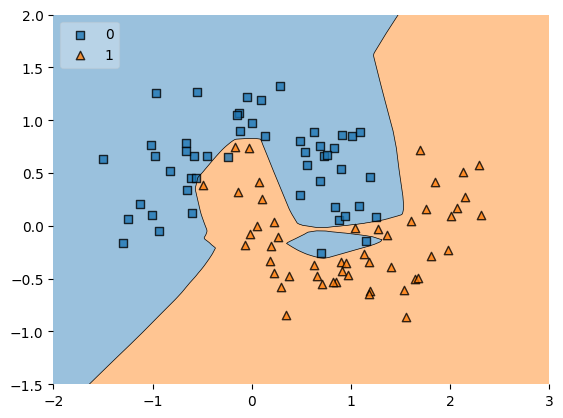

In [ ]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

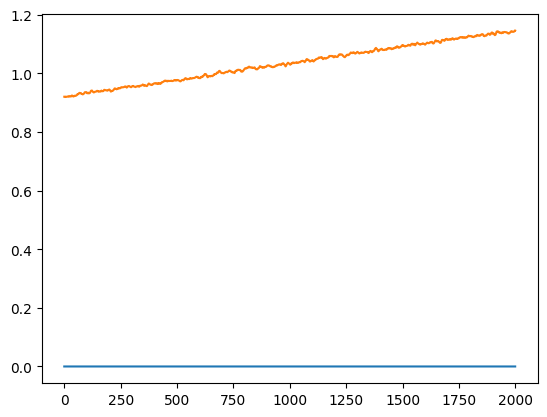

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [ ]:
# This graph showing us overfitting

### Now let's try with Regularization L2

In [9]:
model2 = Sequential()

model2.add(Dense(128,input_dim=X.shape[1], activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid')) #binary classification

model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [10]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history2 = model2.fit(X, y,
                      epochs=2000,
                      validation_split = 0.2,
                      verbose=2
                      )

Epoch 1/2000
3/3 - 1s - loss: 4.0617 - accuracy: 0.8000 - val_loss: 2.7627 - val_accuracy: 0.7000 - 1s/epoch - 367ms/step
Epoch 2/2000
3/3 - 0s - loss: 2.3122 - accuracy: 0.8625 - val_loss: 1.6389 - val_accuracy: 0.7500 - 79ms/epoch - 26ms/step
Epoch 3/2000
3/3 - 0s - loss: 1.2845 - accuracy: 0.9000 - val_loss: 1.0814 - val_accuracy: 0.7500 - 58ms/epoch - 19ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.7558 - accuracy: 0.9000 - val_loss: 0.8599 - val_accuracy: 0.7500 - 73ms/epoch - 24ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.5492 - accuracy: 0.9125 - val_loss: 0.8131 - val_accuracy: 0.7500 - 180ms/epoch - 60ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.4993 - accuracy: 0.9000 - val_loss: 0.8156 - val_accuracy: 0.7500 - 145ms/epoch - 48ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.5052 - accuracy: 0.8875 - val_loss: 0.8346 - val_accuracy: 0.7500 - 179ms/epoch - 60ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.4988 - accuracy: 0.9125 - val_loss: 0.8245 - val_accuracy: 0.7500 - 91ms/epoch - 30ms/step
Epoch 9/2000
3

9600/9600 [==============================] - 15s 2ms/step


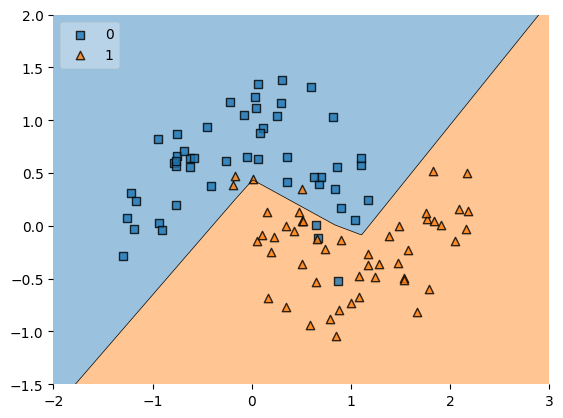

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

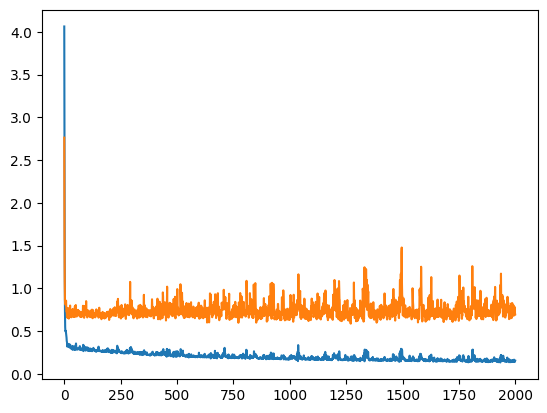

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

46875/46875 [==============================] - 82s 2ms/step


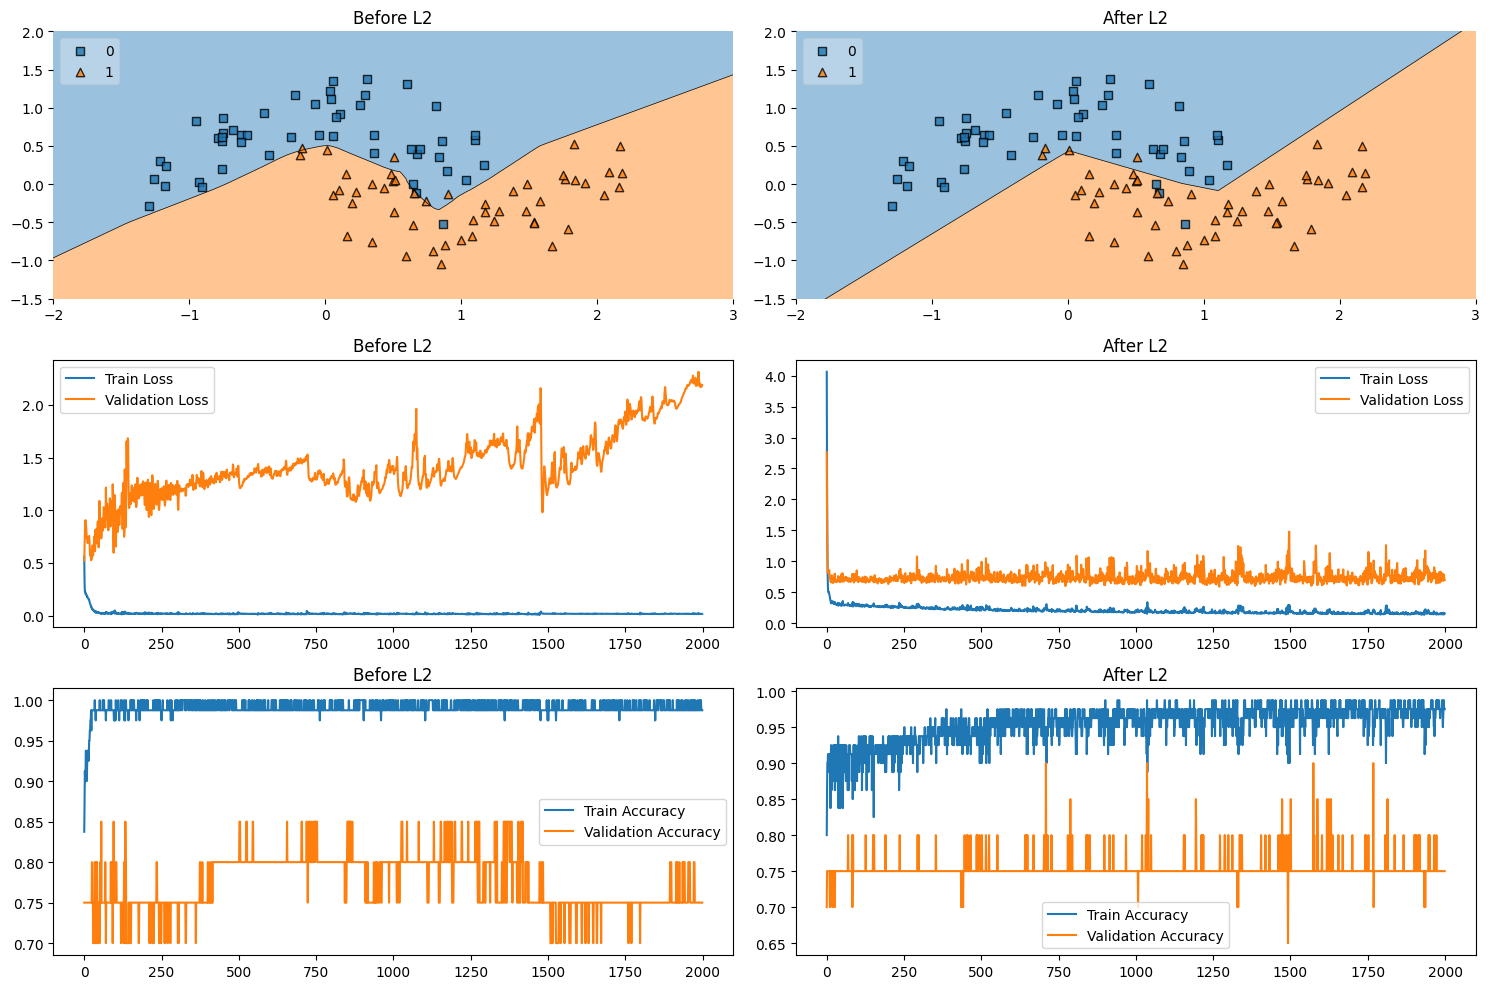

In [30]:
# Assuming you have model1, model2, and history for both models
plt.figure(figsize=(15, 10))

# Decision regions for model 1
plt.subplot(3, 2, 1)
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.title('Before L2')

# Loss curve for model 2
plt.subplot(3, 2, 2)
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.title('After L2')

# Loss curve for model 1
plt.subplot(3, 2, 3)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Before L2')

# Loss curve for model 2
plt.subplot(3, 2, 4)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('After L2')

# Accuracy curve for model 1
plt.subplot(3, 2, 5)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Before L2')

# Accuracy curve for model 2
plt.subplot(3, 2, 6)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('After L2')

plt.tight_layout()
plt.show()

The regularization term penalizes large weights, discouraging the model from relying too much on any single feature and promoting a more evenly distributed set of weights. This can help prevent overfitting by reducing the complexity of the model.

In [15]:
# See the difference

In [16]:
model1.get_weights()[0].shape, model2.get_weights()[0].shape

((2, 128), (2, 128))

In [17]:
# see input 2 and 128 layers as we set it before now we can reshape it let's do it

In [18]:
model1.get_weights()[0].reshape(256).shape, model2.get_weights()[0].reshape(256).shape

((256,), (256,))

In [19]:
# have a loot it's changed
# let's keep this into variable

In [20]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

In [21]:
# let's check both model outliers now

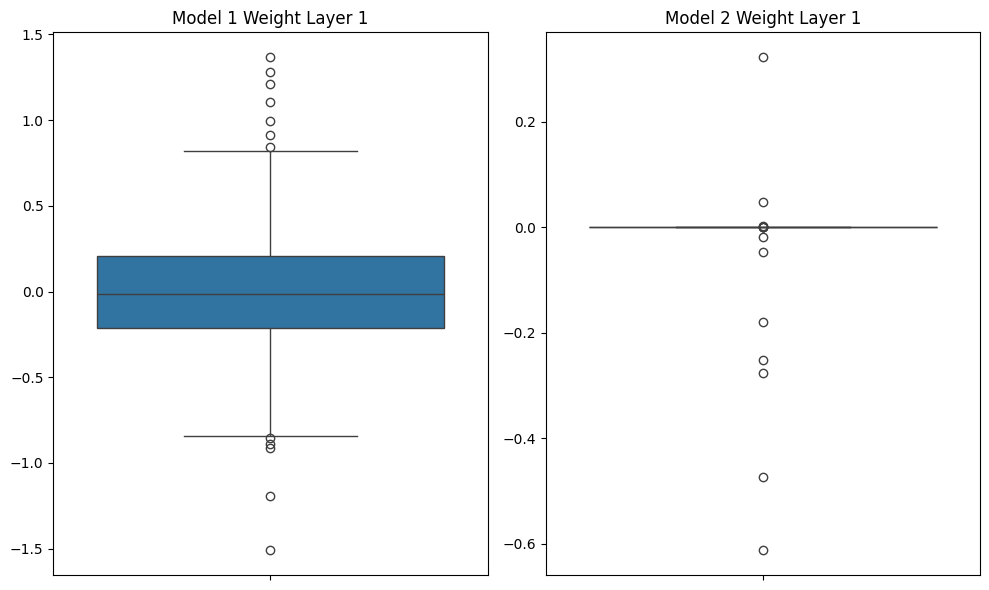

In [22]:
# Assuming you have model1_weight_layer1 and model2_weight_layer1 data
plt.figure(figsize=(10, 6))

# Box plot for model 1
plt.subplot(1, 2, 1)
sns.boxplot(y=model1_weight_layer1)
plt.title('Model 1 Weight Layer 1')

# Box plot for model 2
plt.subplot(1, 2, 2)
sns.boxplot(y=model2_weight_layer1)
plt.title('Model 2 Weight Layer 1')

plt.tight_layout()
plt.show()


In [23]:
# See the difference

In [24]:
# Model1
min = model1_weight_layer1.min()
print(f'Min: {min}')
max = model1_weight_layer1.max()
print(f'Max: {max}')

Min: -1.5103368759155273
Max: 1.3678897619247437


In [25]:
# Model2
min = model2_weight_layer1.min()
print(f'Min: {min}')
max = model2_weight_layer1.max()
print(f'Max: {max}')

Min: -0.6123224496841431
Max: 0.3226214051246643


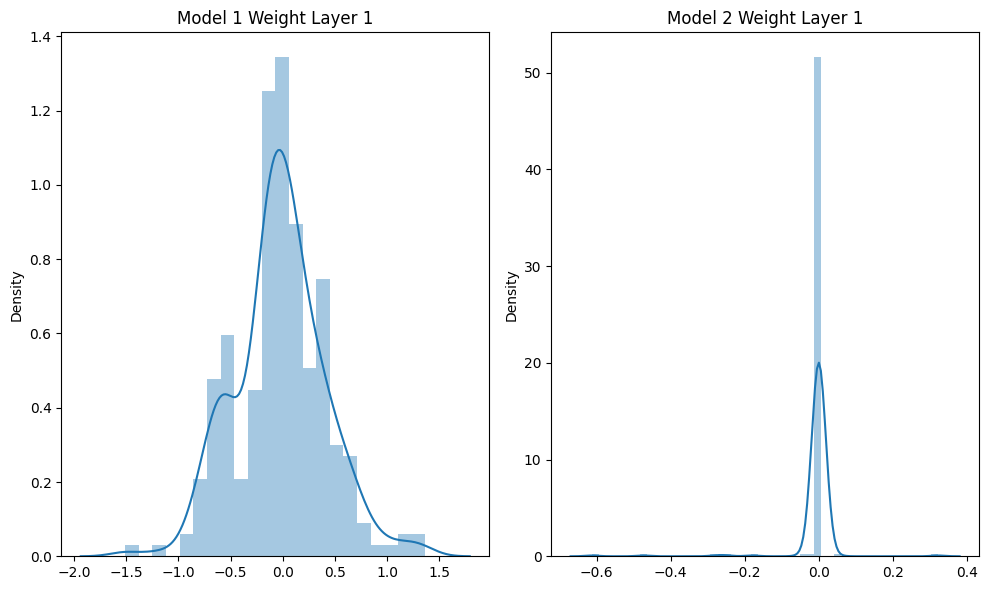

In [26]:
# Assuming you have model1_weight_layer1 and model2_weight_layer1 data
plt.figure(figsize=(10, 6))

# Box plot for model 1
plt.subplot(1, 2, 1)
sns.distplot(model1_weight_layer1)
plt.title('Model 1 Weight Layer 1')

# Box plot for model 2
plt.subplot(1, 2, 2)
sns.distplot(model2_weight_layer1)
plt.title('Model 2 Weight Layer 1')

plt.tight_layout()
plt.show()

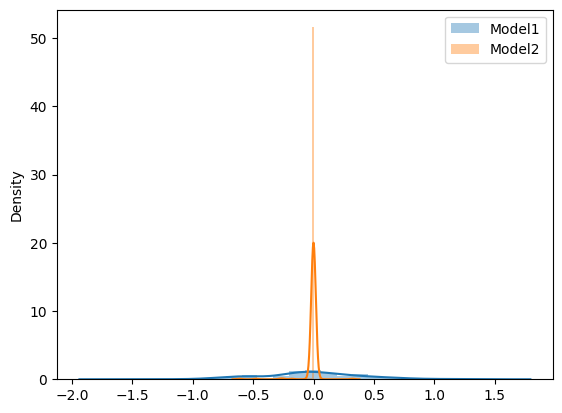

In [27]:
sns.distplot(model1_weight_layer1, label='Model1')
sns.distplot(model2_weight_layer1, label='Model2')
plt.legend()

In [28]:
model1.get_weights()[0].reshape(256)

array([-5.90815604e-01, -8.40951800e-01, -3.34932804e-02, -7.52359211e-01,
       -1.70260891e-01,  6.66644946e-02, -5.07928371e-01, -6.63661778e-01,
        1.02659330e-01,  2.50417650e-01, -2.21402094e-01, -4.70285952e-01,
       -6.10399663e-01, -1.91456705e-01, -1.53043523e-01,  3.78587484e-01,
       -1.99562594e-01, -7.55171239e-01,  1.64142638e-01,  1.45941958e-01,
       -1.15353623e-02,  4.78985836e-04,  8.38002935e-02,  1.59567744e-01,
       -2.31919959e-02, -6.85680211e-01, -5.07409759e-02, -7.35217094e-01,
       -2.91521307e-02,  7.22526312e-02,  1.17362675e-03, -1.07664444e-01,
        3.67424577e-01,  9.90326609e-03, -8.52369070e-01, -9.13372219e-01,
        3.49579692e-01, -2.22345084e-01,  4.37664419e-01, -2.06711024e-01,
       -6.13283038e-01, -5.65858245e-01, -5.53865612e-01,  3.22734207e-01,
        1.96055263e-01,  2.94434488e-01, -7.97092736e-01,  1.38853742e-02,
       -4.80997384e-01, -2.02651694e-02, -6.01776659e-01,  2.43560880e-01,
       -5.69290876e-01, -